# Guide for initial setup for the project

### Install Anaconda in your machine to use Python and Jupyter Notebook
       Reference:
       For windows - https://docs.anaconda.com/anaconda/install/windows/
       For Ubuntu  - https://docs.anaconda.com/anaconda/install/linux/
       For MacOS   - https://docs.anaconda.com/anaconda/install/mac-os/
   
### Create a local repository ( folder ) for the project 
       2.1 Download all the dataset provided in the problem statement
       2.2 Move all the dataset in project folder

### To use Jupyter Notebook in Anaconda
       3.1 Open "Conda" terminal in your machine
       3.2 Navigate to project folder created in step-2
       ( Ref - https://docs.anaconda.com/ae-notebooks/4.3.1/user-guide/basic-tasks/apps/use-terminal/)
       3.3 Use the "jupyter notebook" command to open the jupyter notebook interface
       ( Ref - https://docs.anaconda.com/ae-notebooks/user-guide/basic-tasks/apps/jupyter/index.html)

### Installing the required python libraries
       4.1 Download the provided requirements.txt file and move it to the project folder
       4.2 Use the "pip install -r requirements.txt" command to install all of the required modules and packages.
           This will install most of the required libraries for the project.
           ( Ref - https://learnpython.com/blog/python-requirements-file/)
       4.3 To install any other libraries refer
           https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/


In [55]:
!pip install wordcloud

In [56]:
# Importing liberaries

import pandas as pd 
import numpy as np
from ast import literal_eval  # evaluate strings containing Python code in the current Python environment
from nltk.stem.snowball import SnowballStemmer # Removing stem words
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # To convert text to numerical data
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from collections import defaultdict
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import seaborn as sns
import networkx as nx

import warnings  # disable python warnings
warnings.filterwarnings("ignore")

In [57]:
# Loading datasets 

movies_data = pd.read_csv("/Users/harsh/Downloads/Dataset/movies_metadata.csv", low_memory=False)
credits = pd.read_csv('/Users/harsh/Downloads/Dataset/credits.csv')
keywords = pd.read_csv('/Users/harsh/Downloads/Dataset/keywords.csv')
links_small = pd.read_csv('/Users/harsh/Downloads/Dataset/links_small.csv')
ratings = pd.read_csv("/Users/harsh/Downloads/Dataset/ratings_small.csv")

In [58]:
movies_data

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [59]:
movies_data.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [60]:
# Checking for null values in the dataset

print(movies_data.isnull().sum(),'\n') # We have used only selected column of the dataset which include genres,id,vote_average,vote_count
print(links_small.isnull().sum(),'\n')
print(ratings.isnull().sum(),'\n')
print(keywords.isnull().sum(),'\n')
print(credits.isnull().sum(),'\n')


adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64 

movieId     0
imdbId      0
tmdbId     13
dtype: int64 

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64 

id          0
keywords    0
dtype: int64 

cast    0
crew    0
id      0
dtype: int64 



In [61]:
# Removing the rows with null value in the vote_average and vote_count columns in movies_data dataframe

movies_data = movies_data.dropna(subset=['vote_average', 'vote_count'])
print(movies_data.isnull().sum(),'\n')

adult                        0
belongs_to_collection    40970
budget                       0
genres                       0
homepage                 37682
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   0
poster_path                383
production_companies         0
production_countries         0
release_date                84
revenue                      0
runtime                    257
spoken_languages             0
status                      81
tagline                  25048
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64 



## SIMPLE RECOMMENDER SYSTEM

A simple recommender is a genral recommender system. It gives same recommendation to all the users irrespective of users preferences.The basic idea behing this recommender system is that a movies that is more popular will have the higher probability of being like by the average people.

Steps involved:
1. We will use IMDB's weighted rating formula to calculate the overall rating of a perticular movie and store it in column name 'score'.

    weighted rating: (v/v+m)*R + (m/m+v)*C
    
    where,
           m = Minimum vote count required to be listed in chart.
           v = Total number of votes of the movie (given in the dataset with column name 'vote_count')
           R = Average rating of the movie (given in the dataset with column name 'vote_average' )
           C = Average vote across all dataset (total vote divided by total movies)
           
2. Then will sort the movie is accending order accoding to the score and finally will get the top movies.

In [62]:
# Simple Recommender (Top movies irrespective of genres)

# Weighted rating
def weighted_rating(v,R):
    
    '''
    
    This function calculate weighted rating of a movies using IMDB formula
    
    Parameters: v (int): vote count
                R (int): vote average
    Returns: (float) IMDB score
    
    '''
    return ((v/(v+m)) * R) + ((m/(m+v)) * C)  



C = movies_data['vote_average'].mean()         # mean vote across all data
m = movies_data['vote_count'].quantile(0.95)   # movies with more than 95% votes is taken (95 percentile)

# Taking movies whose vote count is greater than m
top_movies = movies_data.copy().loc[movies_data['vote_count'] >= m]
top_movies = top_movies.reset_index()

top_movies['score'] = ''

for i in range(top_movies.shape[0]):
    v = top_movies['vote_count'][i]          # number of vote count of the movie
    R = top_movies['vote_average'][i]        # average rating of the movie
    top_movies['score'][i] = weighted_rating(v,R)

top_movies = top_movies.sort_values('score', ascending=False)  # sorting movies in descending order according to score
top_movies = top_movies.reset_index()

# top_movies[['title', 'vote_count', 'vote_average', 'score']].head(20) # top 20 movies
t1 = top_movies[['title', 'score']].head(20)

print(t1)

                                            title     score
0                        The Shawshank Redemption  8.357746
1                                   The Godfather  8.306334
2                                 The Dark Knight  8.208376
3                                      Fight Club  8.184899
4                                    Pulp Fiction  8.172155
5                                    Forrest Gump  8.069421
6                                Schindler's List  8.061007
7                                        Whiplash  8.058025
8                                   Spirited Away  8.035598
9                         The Empire Strikes Back  8.025793
10                                      Inception  8.025763
11                              Life Is Beautiful  8.014521
12                               The Intouchables  8.008265
13                                   Interstellar  8.007315
14                         The Godfather: Part II  7.997846
15  The Lord of the Rings: The Return of

In [63]:
# Distribution of average vote among movies in the dataset

fig = px.histogram(top_movies, x="vote_average")
fig.show()

### The following is also a simple recommender system but it's based on genres.

Steps involved:
1. Finding how many different types of genres are present.
2. Making a dictionary of genres (keys = genres name, values = list of movies belongs to the given genre)
3. Finaly sorting the values based on the score calculated above.

In [64]:
# Simple recommender based on genres

genres = set()

# Finding the exhaustive set of genres in the dataset 
top_movies['genres'] = top_movies['genres'].apply(literal_eval)
for i in range(top_movies['genres'].shape[0]):   # converting string in map
    for x in top_movies['genres'][i]:
        genres.add(x['name'])
        
# creating map of string (genre name) and movies names(dataframe)
genres_based = dict()   
for i in range(top_movies['genres'].shape[0]):  
    for x in top_movies['genres'][i]:
        if x['name'] not in genres_based.keys():
            genres_based[x['name']] = pd.DataFrame(columns = top_movies.columns)
        genres_based[x['name']] = genres_based[x['name']].append(top_movies.iloc[i])  

In [65]:
# Visualizing frequency of occurence of different genres

# Creating a count vector (list) containing frequency of a perticular genre
cnt = list()
for i in genres:
    cnt.append(genres_based[i].shape[0])
    
# Making a datafram 
genre_cnt = pd.DataFrame( { 'genres' : list(genres),
                            'count'  : cnt
    
},
                         columns = ['genres','count']
)

fig = px.bar(genre_cnt, x='genres', y='count')
fig.show()

In [66]:
def genres_based_rcmnd(name):
    
    '''
    
    This function returns the top 10 movies of the given genre
    
    Parameters: name (string): Name of the genre
    
    Returns: (Dataframe) Top 10 move recommendation
    
    '''
    
    if name not in genres:
        return None
    else:
        return genres_based[name][['title', 'vote_count', 'vote_average', 'score']].head(10)


print(genres_based_rcmnd("Comedy"))

                          title vote_count vote_average     score
5                  Forrest Gump     8147.0          8.2  8.069421
11            Life Is Beautiful     3643.0          8.3  8.014521
12             The Intouchables     5410.0          8.2  8.008265
30           Back to the Future     6239.0          8.0  7.845092
35     The Grand Budapest Hotel     4644.0          8.0  7.796436
41      The Wolf of Wall Street     6768.0          7.9  7.762497
42                   Inside Out     6737.0          7.9  7.761902
52  Dilwale Dulhania Le Jayenge      661.0          9.1  7.720002
57                   La La Land     4745.0          7.9  7.708786
62                           Up     7048.0          7.8  7.673443


## CONTENT BASED RECOMMENDER SYSTEM 

### Metadata Based Recommender [ recommender based on movies keywords, cast, director(from crew dataset) and genres ]

This is more personalized. As this computes similarities between movies based on Movie Cast, Crew, Keywords and Genre.
We will be using movie metadata (or content) to build this engine, this also known as Content Based Filtering. We will be using subset of movie due to limited computing power.

Steps involved:
1. Preprocessing the data:
                  1.1 Cleaning the data ( manually verified and removed data with wrong format )
                  1.2 Merging credits and keywords csv to the original dataset ie, movies_data
                  1.3 Using only those movie which is present in links_small dataset ( it is a dataset which links movieid with   imdb and tmdbid )
    
2. Creating a column name soup which contains director, cast, keywords and genres of the movie. Director name is written three times to give more weightage to the director and only top three cast name is taken.

3. Then we used Count Vectorizer to create the count matrix and then we applied cosine similarity to calculate a numeric quantity that denotes the similarity between two movies.

4. Finally, movies are recommended on the basis of cosine similarity values. Higher its value more is movie similar to that movie.

In [67]:
#Preprocessing the data

movies_data['id'] = movies_data['id'].astype('int')  #The astype() function is used to cast a pandas object to a specified data type.

# merging both credits and keywords in movies_data on the basis of movie id
movies_data = movies_data.merge(credits, on='id')
movies_data = movies_data.merge(keywords, on='id')

links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

# taking only those movies whos id is present in link_small because of limited computing power
smd = movies_data[movies_data['id'].isin(links_small)]  
smd = smd.reset_index()

smd

,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9214,40948,False,NaN,8000000,"[{'id': 18, 'name': 'Drama'}]",NaN,159550,tt0255313,en,The Last Brickmaker in America,...,[],Released,NaN,The Last Brickmaker in America,False,7.0,1.0,"[{'cast_id': 1, 'character': 'Henry Cobb', 'cr...","[{'credit_id': '544475aac3a36819fb000578', 'de...","[{'id': 6054, 'name': 'friendship'}, {'id': 20..."
9215,41168,False,NaN,1000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 10749,...",NaN,392572,tt5165344,hi,रुस्तम,...,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,Decorated Officer. Devoted Family Man. Defendi...,Rustom,False,7.3,25.0,"[{'cast_id': 0, 'character': 'Rustom Pavri', '...","[{'credit_id': '5951baf692514129c4016600', 'de...","[{'id': 10540, 'name': 'bollywood'}]"
9216,41221,False,NaN,15050000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,402672,tt3859980,hi,Mohenjo Daro,...,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,Mohenjo Daro,False,6.7,26.0,"[{'cast_id': 0, 'character': 'Sarman', 'credit...","[{'credit_id': '57cd5d3592514179d50018e8', 'de...","[{'id': 10540, 'name': 'bollywood'}]"
9217,41387,False,NaN,15000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,315011,tt4262980,ja,シン・ゴジラ,...,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,A god incarnate. A city doomed.,Shin Godzilla,False,6.6,152.0,"[{'cast_id': 4, 'character': 'Rando Yaguchi : ...","[{'credit_id': '560892fa92514177550018b2', 'de...","[{'id': 1299, 'name': 'monster'}, {'id': 7671,..."


## Movie Description Based Recommendor Sytem

In [68]:
smd['tagline'] = smd['tagline'].fillna('')
smd['description'] = smd['overview'] + smd['tagline']
smd['description'] = smd['description'].fillna('')

In [69]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(smd['description'])

In [70]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [71]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

In [72]:
def get_recommendation_desc(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [73]:
get_recommendation_desc('The Dark Knight').head(10)

8031                      The Dark Knight Rises
132                              Batman Forever
1134                             Batman Returns
8334    Batman: The Dark Knight Returns, Part 2
7659                 Batman: Under the Red Hood
524                                      Batman
8001                           Batman: Year One
2599               Batman: Mask of the Phantasm
2716                                        JFK
8265    Batman: The Dark Knight Returns, Part 1
Name: title, dtype: object

## Metadata Based Recommender

In [74]:
def get_director(x):
    
    '''
    
    This function gives the name of first director occuring in the crew of the movie
    
    Parameters: x(list of dictionary): List containing name and corrosponding role of complete cast of the movie
    
    Returns: (string) It returns the first director name that appear in the list
    
    '''
    
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan


# Applying literal_eval to get the right data type from the expression of string
smd['cast'] = smd['cast'].apply(literal_eval)
smd['crew'] = smd['crew'].apply(literal_eval)
smd['keywords'] = smd['keywords'].apply(literal_eval)
smd['genres'] = smd['genres'].apply(literal_eval)

smd['director'] = smd['crew'].apply(get_director) 

# Taking all the movie cast in a list and then taking only the top 3 cast
smd['cast'] = smd['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
smd['cast'] = smd['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)
smd['cast'] = smd['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])# Strip Spaces and Convert to Lowercase

smd['keywords'] = smd['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

smd['genres'] = smd['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
smd['genres'] = smd['genres'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

smd['director'] = smd['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
smd['director'] = smd['director'].apply(lambda x: [x,x,x])  # giving more weight to the director relative to the entire cast

In [75]:
def filter_keywords(x):
    
    '''
    
    This funtion remove those keywords which occur only once 
    
    Parameters: x(list): List containing keywords of the movie
    
    Returns: (list) It returns a list containg only those keywords which are present in keywords_count ( it is a dictionary containg those keywords which occur more than once )
    
    '''    
    
    words = []
    for i in x:
        if i in keywords_count.keys():
            words.append(i)
    return words


# Creating the count of every keywords
keywords_count = dict()
for i in range(len(smd['keywords'])):
    for j in range(len(smd['keywords'][i])):
        if smd['keywords'][i][j] not in keywords_count.keys():
            keywords_count[smd['keywords'][i][j]] = 0
        keywords_count[smd['keywords'][i][j]] +=1

# removing those keywords which occur only once
for i in list(keywords_count):
    if keywords_count[i] == 1:
        del keywords_count[i]

In [76]:
# preprocessing

# Stemming the words 
stemmer = SnowballStemmer('english')

smd['keywords'] = smd['keywords'].apply(filter_keywords) # removing those keywords which occur only once
smd['keywords'] = smd['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
smd['keywords'] = smd['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

# combining keywords, cast, director and genres
smd['soup'] = smd['keywords'] + smd['cast'] + smd['director'] + smd['genres']
smd['soup'] = smd['soup'].apply(lambda x: ' '.join(x))
smd['soup'][0] 

'jealousi toy boy friendship friend rivalri boynextdoor newtoy toycomestolif tomhanks timallen donrickles johnlasseter johnlasseter johnlasseter animation comedy family'

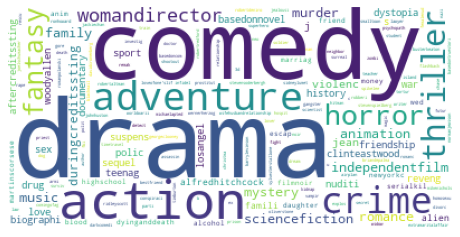

In [77]:
# Creating the Wordcloud for visualisation of the word which occur frequently in the dataset

# Combining all the text contained in smd['soup'] column
text = ""
for i in smd['soup']:
    text +=i
    
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
# plot the WordCloud image                      
plt.figure(figsize = (8, 8))
plt.imshow(word_cloud)
plt.axis("off")
 
plt.show()

### Definitions of terms used in the below code

1. CountVectorizer is a tool provided by the scikit-learn library in Python. 
2. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.
3. stop_words='english' is a built-in list, ngram_range is just a string of n words in a row.
4. Cosine similarity is a measure of similarity, often used to measure document similarity in text analysis.

In [78]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2) ,min_df=0, stop_words='english')
count_matrix = count.fit_transform(smd['soup'])

cosine_sim = cosine_similarity(count_matrix, count_matrix)

titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])  # Creating a mapping between movie and title and index

In [79]:
df_cosine=pd.DataFrame(cosine_sim)
df_cosine

,0,1,2,3,4,5,6,7,8,9,...,9209,9210,9211,9212,9213,9214,9215,9216,9217,9218
0,1.000000,0.024419,0.027390,0.025777,0.024419,0.000000,0.026547,0.029348,0.000000,0.000000,...,0.000000,0.000000,0.023816,0.000000,0.020947,0.030500,0.000000,0.000000,0.000000,0.0
1,0.024419,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061633,0.027067,0.021592,...,0.000000,0.000000,0.050016,0.000000,0.000000,0.000000,0.000000,0.029735,0.025641,0.0
2,0.027390,0.000000,1.000000,0.060718,0.028760,0.000000,0.062531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.024671,0.000000,0.034565,0.033352,0.000000,0.0
3,0.025777,0.000000,0.060718,1.000000,0.027067,0.019263,0.058849,0.032530,0.000000,0.000000,...,0.000000,0.023669,0.026398,0.033806,0.023218,0.033806,0.032530,0.062776,0.027067,0.0
4,0.024419,0.000000,0.028760,0.027067,1.000000,0.000000,0.027875,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.021995,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9214,0.030500,0.000000,0.000000,0.033806,0.000000,0.022792,0.000000,0.038490,0.000000,0.000000,...,0.000000,0.028006,0.031235,0.040000,0.000000,1.000000,0.000000,0.037139,0.032026,0.0
9215,0.000000,0.000000,0.034565,0.032530,0.000000,0.021932,0.033501,0.000000,0.032530,0.025950,...,0.000000,0.026948,0.000000,0.038490,0.000000,0.000000,1.000000,0.071474,0.000000,0.0
9216,0.000000,0.029735,0.033352,0.062776,0.000000,0.021162,0.032325,0.107211,0.031388,0.025039,...,0.000000,0.026003,0.087002,0.037139,0.000000,0.037139,0.071474,1.000000,0.089205,0.0
9217,0.000000,0.025641,0.000000,0.027067,0.000000,0.036497,0.000000,0.154083,0.081200,0.043183,...,0.000000,0.022422,0.125039,0.032026,0.065986,0.032026,0.000000,0.089205,1.000000,0.0


<AxesSubplot:>

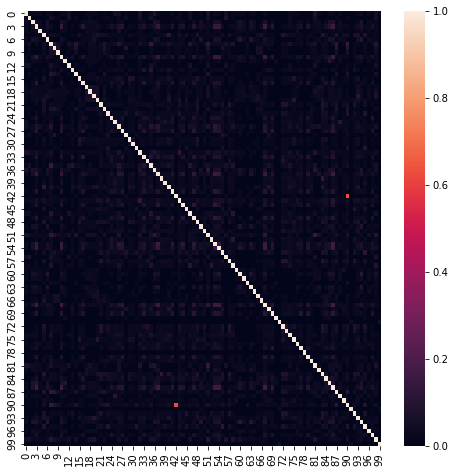

In [80]:
# Creating Heatmap for visualization of correlation between different movies 

#specify size of heatmap
fig, ax = plt.subplots(figsize=(8, 8))

#create seaborn heatmap of only top 100 movies
sns.heatmap(cosine_sim[:100,:100])

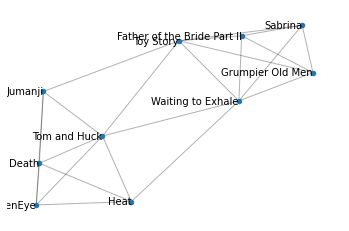

In [81]:
# Graph structure to visualize similarity relation between selected movies

g = nx.Graph()
n = 10

for i in range(n):
    g.add_node(titles[i])

for i in range(n):
    for j in range(n):
        if i != j and cosine_sim[i][j]>0:
            g.add_edge(titles[i],titles[j],weight = cosine_sim[i][j])
    
g = g.to_undirected()
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, node_size = 20)
nx.draw_networkx_edges(g, pos,alpha = 0.3)
nx.draw_networkx_labels(g, pos, font_size=10, horizontalalignment="right")

plt.axis("off")
plt.show()

In [82]:
indices

title
Toy Story                                                0
Jumanji                                                  1
Grumpier Old Men                                         2
Waiting to Exhale                                        3
Father of the Bride Part II                              4
                                                      ... 
The Last Brickmaker in America                        9214
Rustom                                                9215
Mohenjo Daro                                          9216
Shin Godzilla                                         9217
The Beatles: Eight Days a Week - The Touring Years    9218
Length: 9219, dtype: int64

In [83]:
def get_recommendations(title):
    
    '''
    
    This function gives the top 10 movies according to the cosine similarities calculated above along with the movie id
    
    Parameters: title (string) : Name of the movie present in the smd dataset
    
    Returns: (list) Top 10 movies along with the movie id
    
    
    '''
    
    idx = indices[title] # movie id corrosponding to the given title 
    sim_scores = list(enumerate(cosine_sim[idx])) # list of cosine similarity scores value along the given index
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) # sorting the given scores in ascending order
    sim_scores = sim_scores[1:31] # Taking only the top 30 scores
    movie_indices = [i[0] for i in sim_scores] # Finding the indices of 30 most similar movies
    return titles.iloc[movie_indices] 

get_recommendations('The Dark Knight').head(10)

8031         The Dark Knight Rises
6218                 Batman Begins
6623                  The Prestige
2085                     Following
7648                     Inception
4145                      Insomnia
3381                       Memento
8613                  Interstellar
7659    Batman: Under the Red Hood
1134                Batman Returns
Name: title, dtype: object

In [84]:
get_recommendations('Interstellar').head(10)

7648                Inception
2085                Following
6623             The Prestige
6981          The Dark Knight
3381                  Memento
4145                 Insomnia
8031    The Dark Knight Rises
6218            Batman Begins
4153           Silent Running
129                 Apollo 13
Name: title, dtype: object

## Collaborative filtering

Collaborative Filtering is based on the idea that users similar to a me can be used to predict how much I will like a particular product or service those users have used/experienced but I have not. We will be using Surprise library which uses algorithms like Singular Value Decomposition (SVD) to minimise RMSE (Root Mean Square Error) and other metrics and give great recommendations.

Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data. It is taking as input ratings of few movies done by a set of users and predicting the rating of remaining movies by using collaborative filtering algorithm ( in this we are using SVD algorithm ).

SVD creates a lower dimensional representation for each user and movie based on some latent factors(featurs of movies) and based on these lower dimensional representation model predicts rating of user for other movie. The dimension of latent factor can be controlled by n_factor parameter of a model ( its default value is 100 ). Usually, the quality of the training set predictions grows with as n_factors gets higher.


Steps involved:
1. Preprocessing of data ( removing irrelevant columns, checking NAN values etc )
2. Using surprise library to make train and test dataset
3. Trained the model on the available data ( training dataset ) 
4. Finally, tested the quality of model by using RMSE and MAE 
5. Now that our model is fitted, we can call predict to get some predictions. predict returns an internal object Prediction which can be easily converted back to a dataframe.

Mean Absolute Error (MAE) measures the average magnitude of the errors in a set of predictions, without considering their direction. 
Root mean squared error (RMSE) is the square root of the average of squared differences between prediction and actual observation. 
Lower value of both RMSE and MAE is considered to be good.


In [85]:
# drop the timestamp column since we dont need it now
ratings = ratings.drop(columns="timestamp")

#checking for missing values
ratings.isna().sum()

#check for the numbers of total movies and users
movies= ratings['movieId'].nunique()  #nunique is similar to count but only takes unique values
users=ratings['userId'].nunique()
print('total number of movies =', movies)
print('total number of users =', users)

#  HIstogram showing frequency of ratings given by different users
fig = px.histogram(ratings, x="rating")
fig.show()

total number of movies = 9066
total number of users = 671


In [86]:
# columns to use for training
columns = ['userId','movieId','rating']

# create reader from surprise 
# the rating should lie in the provided scale
reader = Reader(rating_scale =(0.5,5))

#create dataset from dataframe
data = Dataset.load_from_df(ratings[columns],reader)

# create trainset ie the data which is present (ratings of those movies which are rated by respective users)
trainset = data.build_full_trainset()

# create testset, here the anti_testset is testset
# data containing users movie pairs which are not rated by that particular user
testset = trainset.build_anti_testset()
 

model = SVD(n_epochs = 30, verbose = True) #n_epochs:The number of iteration of the SGD(simple gradient descent) procedure. Default is 20
                                           #verbose:If True, prints the current epoch. Default is False.
    
cross_validate(model, data, measures=['RMSE','MAE'], cv= 5, verbose= True)
print('Training Done')

#prediction
prediction = model.test(testset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20


### Using user rating of selected movies to get suitable recommendations

1. To incorporate the user in the system we inspected the dataset and found that mostly users have around 5-10 ratings.
2. To get recommendation according to taste of user we prompt the user to rate the selected movies.
3. We add those selection to our standerd dataset and run the collaborative filtering algorithm to get the ratings of other movies.
4. Finally, recommending top 10 movies based on highest ratings.

In [87]:
example = { 'userId' : [99999,99999,99999,99999,99999],
           'movieId' : [31,1029,1293,1172,1343],
           'rating'  : [3.0, 4.5, 1.2, 3.3,2]
    
}

df = pd.DataFrame(example)
frames = [ratings, df]
result = pd.concat(frames)

In [88]:
#create dataset from dataframe
data= Dataset.load_from_df(result[columns],reader)

#create trainset
trainset= data.build_full_trainset()

#create testset, here the anti_testset is testset
testset = trainset.build_anti_testset()

cross_validate(model,data, measures=['RMSE','MAE'], cv= 5, verbose= True) #cv is the number of parts in which data will be divided.
print('Training Done')

#prediction
prediction = model.test(testset)
prediction[99999]

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20


Prediction(uid=12, iid=4344, r_ui=3.5435710786029255, est=2.512706090188781, details={'was_impossible': False})

In [89]:
def get_top_n(prediction, n):
    
    '''
    This function recommend users with top n movies based on prediction calculated using the surprise library
    
    Parameters: prediction(list): This contains (user, movie) rating prediction for all user movie pairs
                n(int): Number of recommendations
    
    Results: Returns top 30 movies along with movie id for all users
    
    
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in prediction: 
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

rcmnd = []
top_n = get_top_n(prediction, n=30)
for uid, user_ratings in top_n.items():
    if uid == 99999:
        for (iid,rating) in user_ratings:
            for i in range(movies_data.shape[0]):
                if movies_data['id'][i] == iid:
                    rcmnd.append([movies_data['id'][i],movies_data['title'][i]])
        break

In [90]:
rcmnd[:10]

[[318, 'The Million Dollar Hotel'],
 [4226, 'Shriek If You Know What I Did Last Friday the Thirteenth'],
 [48780, 'Boat'],
 [31658, 'Hour of the Gun'],
 [926, 'Galaxy Quest'],
 [2019, 'Hard Target'],
 [527, 'Once Were Warriors'],
 [6016, 'The Good Thief'],
 [858, 'Sleepless in Seattle'],
 [2064, 'While You Were Sleeping']]

## Tkinter

Now we will create the interface for our recommender system using python Tkinter library. In this part we have used Genre based and Collaborative filltering based recommender system created in the above sections.

### Basic guide to Tkinter

Tkinter is a python library which allow us to create GUIs.

The components of these GUIs can be arranged using different methods like grid method and frame method. In our code we have used grid method to arrange labels and fields in respective rows and columns. The position of label at a location is controlled by 'sticky' argument.

Apart from label, to get input from the user we have used spinbox and option menu ( i.e. dropdown ) from Tkinter.

In [116]:
!pip install IMDbPY

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 kB 1.8 MB/s eta 0:00:00a 0:00:01


In [141]:
import tkinter as tk
import tkinter.ttk
from tkinter import ttk
from tkinter import *
import tkinter.messagebox
import imdb

In [142]:

l = [None for i in range(10)]

def genre_based():
    '''
       Callback function used for the submit button on the interface

       This function takes input directly from the Tkinter interface and based on the type of input provided it finds recommendation for the user and provide output on the Tkinter interface.

       Parameters: None

       Returns: None 

    ''' 

    for i in range(10):
        if l[i] is not None:
            l[i].grid_remove()
    event = clicked.get()

    # produced recommendations for the user based on the rating provided to selected movies if no genre is selected else recommend top movies from the selected genres
    if event == "Select Genre":
        rtts = list()
        rtts.append(l11.get())
        rtts.append(l12.get())
        rtts.append(l13.get())
        rtts.append(l14.get())
        rtts.append(l15.get())
        movie_ratings = [int(i) for i in rtts]
        print(movie_ratings)
        
        example = { 'userId' : [99999,99999,99999,99999,99999],
           'movieId' : [278, 13,637,122, 11],
           'rating'  : movie_ratings,
                  }
        
        df = pd.DataFrame(example)
        frames = [ratings, df]
        result = pd.concat(frames)
        
        #create dataset from dataframe
        data= Dataset.load_from_df(result[columns],reader)

        #create trainset
        trainset= data.build_full_trainset()

        #create testset, here the anti_testset is testset
        testset = trainset.build_anti_testset()

        cross_validate(model,data, measures=['RMSE','MAE'], cv= 5, verbose= True)
        print('Training Done')

        #prediction
        prediction = model.test(testset)
        prediction[99999]

        # An RMSE value of less than 2 is considered good
        #Now Recommend Users top 10 movies based on prediction

        from collections import defaultdict
        def get_top_n(prediction, n):

            # First map the predictions to each user.
            top_n = defaultdict(list)
            for uid, iid, true_r, est, _ in prediction:
                top_n[uid].append((iid, est))

            # Then sort the predictions for each user and retrieve the n highest ones.
            for uid, user_ratings in top_n.items():
                user_ratings.sort(key=lambda x: x[1], reverse=True)
                top_n[uid] = user_ratings[:n]

            return top_n

        rcmnd = []
        top_n = get_top_n(prediction, n=30)
        for uid, user_ratings in top_n.items():
            if uid == 99999:
                for (iid,rating) in user_ratings:
                    for i in range(movies_data.shape[0]):
                        if movies_data['id'][i] == iid:
                            rcmnd.append([movies_data['id'][i],movies_data['title'][i]])
                break
    
        for i in range(min(10,len(rcmnd))):
            l[i] = Label(root ,  text = rcmnd[i][1])
            l[i].grid(row = 2+i, column = 5, sticky = W, pady = 5)                
    else:
        ll = list((genres_based[event][['title']].head(10))['title'])
        for i in range(min(10,len(ll))):
            l[i] = Label(root ,  text = ll[i])
            l[i].grid(row = 2+i, column = 5, sticky = W, pady = 5)

In [143]:
# temp dataframe contains movies which are present in both ratings and movies_data dataframe

id_list = list(ratings['movieId'])
temp = movies_data.loc[movies_data['id'].isin(id_list)]
temp = temp.reset_index()
print(temp[['id' , 'title']])
temp['title'][1]

         id                       title
0       949                        Heat
1       710                   GoldenEye
2      1408            Cutthroat Island
3       524                      Casino
4      4584       Sense and Sensibility
...     ...                         ...
2843  80831                Sang Pemimpi
2844   3104  Frankenstein Created Woman
2845  64197        Travelling with Pets
2846  98604                  Cinderella
2847  49280            The One-Man Band

[2848 rows x 2 columns]


'GoldenEye'

In [144]:
# This snippet is used to find top ranked movies according to imdb score which are present in temp dataframe.

available_movies = []

for movie in list(t1['title']):
    movie = movie.lower()
    for i in range(temp.shape[0]):
        name = temp['title'][i].lower()
        if name == movie:
            available_movies.append((temp['id'][i] , movie))
            
print(available_movies)

[(278, 'the shawshank redemption'), (238, 'the godfather'), (155, 'the dark knight'), (550, 'fight club'), (680, 'pulp fiction'), (13, 'forrest gump'), (424, "schindler's list"), (129, 'spirited away'), (1891, 'the empire strikes back'), (637, 'life is beautiful'), (240, 'the godfather: part ii'), (122, 'the lord of the rings: the return of the king'), (101, 'leon: the professional'), (510, "one flew over the cuckoo's nest"), (497, 'the green mile'), (11, 'star wars')]


In [145]:
# create root window
root = Tk()

# root window title and dimension4
root.title("AZ Movie Recommender System")

# Set geometry (widthxheight)
root.geometry('1000x400')

''

In [146]:
# Dropdown menu options
lst = [None for i in range(10)]
for i in range(10):
    if lst[i] is not None:
        lst[i].grid_remove()
options = [
    'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'
]

# adding a label to the root window
l1 = Label(root, text = "MOVIE RECOMMENDER SYSTEM", fg = "blue")
l1.grid(row = 0,column = 1)
l2 = Label(root, text = "Select genre of the movie you want to watch : ")
l2.grid(row = 1,column = 0,sticky = W, pady = 2)

# datatype of menu text
clicked = StringVar()

# initial menu text
clicked.set( "Select Genre" )

# Create Dropdown menu
drop = OptionMenu( root , clicked , *options)
drop.grid(row = 3,column = 0, sticky = W)

# Creating seperators for better UI 
x1 = tkinter.ttk.Separator(root, orient=VERTICAL).grid(column=1, row=1, rowspan=12, sticky='ns')

l3 = Label(root, text = "Rate the following movies")
l3.grid(row = 1,column = 2,sticky = W, pady = 2)

# labels for movies name
l4 = Label(root, text="Movies Name").grid(row=2, column=2)
l5 = Label(root, text="the shawshank redemption").grid(row=3, column=2) # 278
l6 = Label(root, text="forest gump").grid(row=4, column=2) # 13
l7 = Label(root, text="life is beautiful").grid(row=5, column=2) #637
l8 = Label(root, text="the lord of the rings: the return of the king").grid(row=6, column=2) #122
l9 = Label(root, text="star wars").grid(row=7, column=2) # 11

# label for movies rating
l10 = Label(root, text="Rate the movie on the scale of 5").grid(row=2, column=3)
l11 = Spinbox(root, from_= 0, to = 5)
l11.grid(row=3, column=3)
l12 = Spinbox(root, from_= 0, to = 5)
l12.grid(row=4, column=3)
l13= Spinbox(root, from_= 0, to = 5)
l13.grid(row=5, column=3)
l14 = Spinbox(root, from_= 0, to = 5)
l14.grid(row=6, column=3)
l15 = Spinbox(root, from_= 0, to = 5)
l15.grid(row=7, column=3)

l17 = Label(root, text = "Content based recommendation system - ")
l17.grid(row = 10,column = 2,sticky = W, pady = 2)

def display_text():
    for i in range(10):
        if l[i] is not None:
            l[i].grid_remove()
    for i in range(10):
        if l[i] is not None:
            l[i].grid_remove()
    global entry
    string= entry.get()
#    label.configure(text=string)
    print(string)
    recom = list(get_recommendations(string).head(10));
#     print(recom)
    for i in range(min(10,len(recom))):
        print(recom[i])
        lst[i] = Label(root ,  text = recom[i])
        lst[i].grid(row = 2+i, column = 5, sticky = W, pady = 5)    
    
   

#Initialize a Label to display the User Input
label=Label(root, text="", font=("Courier 22 bold"))
label.grid(row = 12,column = 2,sticky = W, pady = 2)
# label.pack()

#Create an Entry widget to accept User Input
entry= Entry(root, width= 40)
# entry.pack()
entry.grid(row = 12,column = 2,sticky = W, pady = 2)
# entry.focus_set()
# entry.pack()

#Create a Button to validate Entry Widget
but = Button(root, text= "Okay",fg = "blue",bg = "green",width= 20, command= display_text)
but.grid(row = 14,column = 2, sticky = S)


# button widget with green color text
button = Button(root, text = "SUBMIT" , fg = "blue",bg = "green", command = genre_based)
button.grid(row = 9,column = 1, sticky = S)

# Creating seperators for better UI 
x2 = tkinter.ttk.Separator(root, orient=VERTICAL).grid(column=4, row=1, rowspan=12, sticky='ns')

l16 = Label(root, text="Results").grid(row=1, column= 5, sticky = W, pady=10)

In [147]:
#imdb.IMDb().search_movie("the darc knigth")[0].data

In [ ]:
# start the program
root.mainloop()

1   HIToolbox                           0x00007ff8147930c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff814806f72 _ZN15MenuBarInstance15DisableAutoShowEv + 24
3   HIToolbox                           0x00007ff814807077 _ZN15MenuBarInstanceD2Ev + 113
4   HIToolbox                           0x00007ff814806ebb _ZN15MenuBarInstance7ReleaseEv + 35
5   AppKit                              0x00007ff80e108a0d -[NSHIPresentationInstance discard] + 277
6   AppKit                              0x00007ff80e570952 -[_NSFullScreenSpace(PresentationInstance) discardPresentationInstance] + 36
7   AppKit                              0x00007ff80e5709c7 -[_NSFullScreenSpace(PresentationInstance) activateFullScreenPresentationOptions] + 86
8   AppKit                              0x00007ff80e388db9 -[_NSExitFullScreenTransitionController _doSucceededToExitFullScreen] + 38
9   AppKit                              0x00007ff80e38991b __63-[_NSExitFullScreenT

1   HIToolbox                           0x00007ff814806726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8148062b8 _ZN15MenuBarInstance14EnableAutoShowEv + 52
3   HIToolbox                           0x00007ff814775cd7 _ZN15MenuBarInstance21UpdateAggregateUIModeE21MenuBarAnimationStylehhh + 1113
4   HIToolbox                           0x00007ff814806173 _ZN15MenuBarInstance19SetFullScreenUIModeEjj + 175
5   AppKit                              0x00007ff80dccd4b7 -[NSApplication _setPresentationOptions:instance:flags:] + 1145
6   AppKit                              0x00007ff80db22165 -[NSApplication _updateFullScreenPresentationOptionsForInstance:] + 582
7   CoreFoundation                      0x00007ff80a9016d6 __CFNOTIFICATIONCENTER_IS_CALLING_OUT_TO_AN_OBSERVER__ + 137
8   CoreFoundation                      0x00007ff80a99acbc ___CFXRegistrationPost_block_invoke + 86
9   CoreFoundation                      0x00007ff80a99ac13 _CFXR

Up
Mike's New Car
Monsters, Inc.
Inside Out
Bolt
Creature Comforts
Ice Age: Dawn of the Dinosaurs
Rio
Horton Hears a Who!
One Hundred and One Dalmatians
The Emperor's New Groove


1   HIToolbox                           0x00007ff8147930c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      0

1   HIToolbox                           0x00007ff814806726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff8147930c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      0

1   HIToolbox                           0x00007ff814806726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff8147930c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      0

1   HIToolbox                           0x00007ff814806726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

Up
Mike's New Car
Monsters, Inc.
Inside Out
Bolt
Creature Comforts
Ice Age: Dawn of the Dinosaurs
Rio
Horton Hears a Who!
One Hundred and One Dalmatians
The Emperor's New Groove
dark night


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 160, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 201, in pandas._libs.index.IndexEngine._get_loc_duplicates
  File "pandas/_libs/index.pyx", line 209, in pandas._libs.index.IndexEngine._maybe_get_bool_indexer
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index._unpack_bool_indexer
KeyError: 'dark night'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/vv/1b2s1tts67g1ytxlg3b385r80000gn/T/ipykernel_9460

1   HIToolbox                           0x00007ff814806726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff8147930c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      0

1   HIToolbox                           0x00007ff814806726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff8147930c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      0

1   HIToolbox                           0x00007ff814806726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff8147930c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      0

1   HIToolbox                           0x00007ff814806726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

dark night


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 160, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 201, in pandas._libs.index.IndexEngine._get_loc_duplicates
  File "pandas/_libs/index.pyx", line 209, in pandas._libs.index.IndexEngine._maybe_get_bool_indexer
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index._unpack_bool_indexer
KeyError: 'dark night'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/vv/1b2s1tts67g1ytxlg3b385r80000gn/T/ipykernel_9460

the dark night


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 160, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 201, in pandas._libs.index.IndexEngine._get_loc_duplicates
  File "pandas/_libs/index.pyx", line 209, in pandas._libs.index.IndexEngine._maybe_get_bool_indexer
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index._unpack_bool_indexer
KeyError: 'the dark night'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/vv/1b2s1tts67g1ytxlg3b385r80000gn/T/ipykernel_

the dark knight


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 160, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 201, in pandas._libs.index.IndexEngine._get_loc_duplicates
  File "pandas/_libs/index.pyx", line 209, in pandas._libs.index.IndexEngine._maybe_get_bool_indexer
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index._unpack_bool_indexer
KeyError: 'the dark knight'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/vv/1b2s1tts67g1ytxlg3b385r80000gn/T/ipykernel

the dark knight


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 160, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 201, in pandas._libs.index.IndexEngine._get_loc_duplicates
  File "pandas/_libs/index.pyx", line 209, in pandas._libs.index.IndexEngine._maybe_get_bool_indexer
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index._unpack_bool_indexer
KeyError: 'the dark knight'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/vv/1b2s1tts67g1ytxlg3b385r80000gn/T/ipykernel

the dark knight


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 160, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 201, in pandas._libs.index.IndexEngine._get_loc_duplicates
  File "pandas/_libs/index.pyx", line 209, in pandas._libs.index.IndexEngine._maybe_get_bool_indexer
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index._unpack_bool_indexer
KeyError: 'the dark knight'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/vv/1b2s1tts67g1ytxlg3b385r80000gn/T/ipykernel

the dark knight


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 160, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 201, in pandas._libs.index.IndexEngine._get_loc_duplicates
  File "pandas/_libs/index.pyx", line 209, in pandas._libs.index.IndexEngine._maybe_get_bool_indexer
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index._unpack_bool_indexer
KeyError: 'the dark knight'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/vv/1b2s1tts67g1ytxlg3b385r80000gn/T/ipykernel

the dark knight


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 160, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 201, in pandas._libs.index.IndexEngine._get_loc_duplicates
  File "pandas/_libs/index.pyx", line 209, in pandas._libs.index.IndexEngine._maybe_get_bool_indexer
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index._unpack_bool_indexer
KeyError: 'the dark knight'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/vv/1b2s1tts67g1ytxlg3b385r80000gn/T/ipykernel

rakshit


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 160, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 201, in pandas._libs.index.IndexEngine._get_loc_duplicates
  File "pandas/_libs/index.pyx", line 209, in pandas._libs.index.IndexEngine._maybe_get_bool_indexer
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index._unpack_bool_indexer
KeyError: 'rakshit'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/vv/1b2s1tts67g1ytxlg3b385r80000gn/T/ipykernel_9460/22

Interstellar
Inception
Following
The Prestige
The Dark Knight
Memento
Insomnia
The Dark Knight Rises
Batman Begins
Silent Running
Apollo 13


1   HIToolbox                           0x00007ff8147930c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      0

1   HIToolbox                           0x00007ff814806726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff8147930c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      0

1   HIToolbox                           0x00007ff814806726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff8147930c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      0

1   HIToolbox                           0x00007ff814806726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff8147930c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      0

1   HIToolbox                           0x00007ff814806726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff8147930c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      0

1   HIToolbox                           0x00007ff814806726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff8147930c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      0

1   HIToolbox                           0x00007ff814806726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff8147930c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      0

1   HIToolbox                           0x00007ff814806726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff8147930c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      0

1   HIToolbox                           0x00007ff814806726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff8147930c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      0

1   HIToolbox                           0x00007ff814806726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

Interstellar
Inception
Following
The Prestige
The Dark Knight
Memento
Insomnia
The Dark Knight Rises
Batman Begins
Silent Running
Apollo 13
the dark night


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 160, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 201, in pandas._libs.index.IndexEngine._get_loc_duplicates
  File "pandas/_libs/index.pyx", line 209, in pandas._libs.index.IndexEngine._maybe_get_bool_indexer
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index._unpack_bool_indexer
KeyError: 'the dark night'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/vv/1b2s1tts67g1ytxlg3b385r80000gn/T/ipykernel_

the dark night


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 160, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 201, in pandas._libs.index.IndexEngine._get_loc_duplicates
  File "pandas/_libs/index.pyx", line 209, in pandas._libs.index.IndexEngine._maybe_get_bool_indexer
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index._unpack_bool_indexer
KeyError: 'the dark night'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/vv/1b2s1tts67g1ytxlg3b385r80000gn/T/ipykernel_

the dark night


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 160, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 201, in pandas._libs.index.IndexEngine._get_loc_duplicates
  File "pandas/_libs/index.pyx", line 209, in pandas._libs.index.IndexEngine._maybe_get_bool_indexer
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index._unpack_bool_indexer
KeyError: 'the dark night'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/vv/1b2s1tts67g1ytxlg3b385r80000gn/T/ipykernel_

up


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 160, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 201, in pandas._libs.index.IndexEngine._get_loc_duplicates
  File "pandas/_libs/index.pyx", line 209, in pandas._libs.index.IndexEngine._maybe_get_bool_indexer
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index._unpack_bool_indexer
KeyError: 'up'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/vv/1b2s1tts67g1ytxlg3b385r80000gn/T/ipykernel_9460/2292926

the prestige 


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 160, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 201, in pandas._libs.index.IndexEngine._get_loc_duplicates
  File "pandas/_libs/index.pyx", line 209, in pandas._libs.index.IndexEngine._maybe_get_bool_indexer
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index._unpack_bool_indexer
KeyError: 'the prestige '

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/vv/1b2s1tts67g1ytxlg3b385r80000gn/T/ipykernel_9

Inception
The Prestige
Memento
Insomnia
Following
The Dark Knight Rises
The Dark Knight
Batman Begins
Interstellar
Don Jon
Sky Captain and the World of Tomorrow
Intestellar


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 160, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 201, in pandas._libs.index.IndexEngine._get_loc_duplicates
  File "pandas/_libs/index.pyx", line 209, in pandas._libs.index.IndexEngine._maybe_get_bool_indexer
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index._unpack_bool_indexer
KeyError: 'Intestellar'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/vv/1b2s1tts67g1ytxlg3b385r80000gn/T/ipykernel_946

Intestellar


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 160, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 201, in pandas._libs.index.IndexEngine._get_loc_duplicates
  File "pandas/_libs/index.pyx", line 209, in pandas._libs.index.IndexEngine._maybe_get_bool_indexer
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index._unpack_bool_indexer
KeyError: 'Intestellar'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/harsh/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/vv/1b2s1tts67g1ytxlg3b385r80000gn/T/ipykernel_946

Interstellar
Inception
Following
The Prestige
The Dark Knight
Memento
Insomnia
The Dark Knight Rises
Batman Begins
Silent Running
Apollo 13
Interstellar
Inception
Following
The Prestige
The Dark Knight
Memento
Insomnia
The Dark Knight Rises
Batman Begins
Silent Running
Apollo 13
Inception
The Prestige
Memento
Insomnia
Following
The Dark Knight Rises
The Dark Knight
Batman Begins
Interstellar
Don Jon
Sky Captain and the World of Tomorrow


1   HIToolbox                           0x00007ff8147930c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      0

1   HIToolbox                           0x00007ff814806726 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 102
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      

1   HIToolbox                           0x00007ff8147930c2 _ZN15MenuBarInstance22RemoveAutoShowObserverEv + 30
2   HIToolbox                           0x00007ff8147cf638 _ZL17BroadcastInternaljPvh + 167
3   SkyLight                            0x00007ff80f46b74d _ZN12_GLOBAL__N_123notify_datagram_handlerEj15CGSDatagramTypePvmS1_ + 1030
4   SkyLight                            0x00007ff80f77e04a _ZN21CGSDatagramReadStream26dispatchMainQueueDatagramsEv + 202
5   SkyLight                            0x00007ff80f77df71 ___ZN21CGSDatagramReadStream15mainQueueWakeupEv_block_invoke + 18
6   libdispatch.dylib                   0x00007ff80a6b07fb _dispatch_call_block_and_release + 12
7   libdispatch.dylib                   0x00007ff80a6b1a44 _dispatch_client_callout + 8
8   libdispatch.dylib                   0x00007ff80a6be7b9 _dispatch_main_queue_drain + 952
9   libdispatch.dylib                   0x00007ff80a6be3f3 _dispatch_main_queue_callback_4CF + 31
10  CoreFoundation                      0

#  Additional Guidlines
    
    1. In this we have done content based recommender system using metadata such as cast, crew, keywords and genre.
       You can also try making a movie recommender system using movies overviews and taglines in movies_data dataset.
    
    2. You can try using User-Based Collaborative filtering using Pearson Correlation.
    
       For better understanding of collaborative filtering use the beolow links: 
       (REF - 1. https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75)
       
    3. Instead of using SVD you can use other optimization algorithms like SVD++, K-NN, Slope one, etc. 
       Also try tuning the algorithms parameters using GridSearchCV from scikit-learn.
    
       (REF - https://surpriselib.com/, https://realpython.com/build-recommendation-engine-collaborative-filtering/)
       
    4. For the collaborative filtering based recommender system we are tackling the cold-start problem for user by asking
       ratings for fixed set of movies but this has obvious drawbacks. You can try tackling cold-start problem in better ways.